## Multiple regression 

In [1]:
# Import the mouse data

# Do a multiple regression 

# See how well mouse body and tail length predicts mouse weight

# Show the difference in predicted weights and actual weights using a bar plot
# (you can use pandas or matplotlib pyplot)

# What is the predicted weight of a mouse with body length 100mm and tail length of 23mm?

# What is the R-Squared value for the regression model?

# What are the coefficients and intercept values for the model?


In [2]:
import pandas as pd 
import os
from sklearn import linear_model
from sklearn.metrics import r2_score

In [3]:
file = os.path.join(os.environ['USERPROFILE'],'Desktop','Covid Data','LabMice.xlsx')
file
data = pd.read_excel(file,index_col ='Mouse_ID')
data
data.head()

,Body Length (mm),Weight (grams),Tail Length (mm)
Mouse_ID,,,
1,75,14.0,13.0
2,81,15.0,15.0
3,70,12.5,11.0
4,68,13.0,10.0
5,60,11.0,9.0


In [4]:
# so the x will be two independent values based on which we want to predict the y 
X = data[['Body Length (mm)','Tail Length (mm)']]
y = data['Weight (grams)']

In [5]:
#creating the regression model using sklearn libary 

regression_model = linear_model.LinearRegression()

# passing our X and y values to a  fit function 
regression_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# now that we created the model we can use it to predict mouse weight using the lenght of the body and tail 

# What is the predicted weight of a mouse with body length 100mm and tail length of 23mm?

regression_model.predict([[100,23]])

array([27.40807576])

In [7]:
# What are the intercept and coefficients values for the model?
regression_model.intercept_

0.039945246038199045

In [8]:
regression_model.coef_

array([0.02408452, 1.08520341])

In [9]:
# What is the R-Squared value for the regression model?
# first we feed the real y values and then the predicted ones

predicted_weight = regression_model.predict(X)
r_squared = r2_score(data[['Weight (grams)']],predicted_weight)
print(r_squared)

# we can also get r squared using regression model.score  
r_squared_another_way = regression_model.score(X,y)
print(r_squared_another_way)

0.8883846609682418
0.8883846609682418


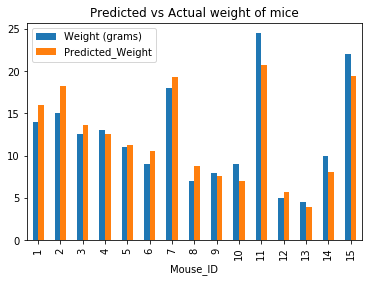

In [10]:
# Show the difference in predicted weights and actual weights using a bar plot
data['Predicted_Weight'] = predicted_weight
data
data[['Weight (grams)','Predicted_Weight']].plot(kind='bar',title ='Predicted vs Actual weight of mice')

# Bar chart with matplotlib


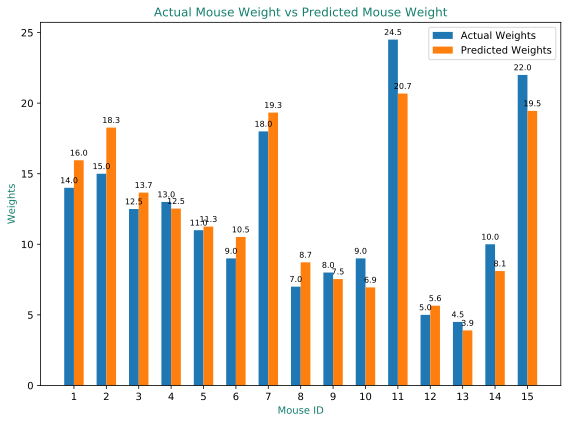

In [41]:
# Bar chart with matplotlib pyplot

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

# Our x values (and xticks) will be our mouse_id's /  index values
x_values =data.index

actual = data["Weight (grams)"]
predicted = data["Predicted_Weight"]

# Width is a percentage of the width of a 1 mouse unit (space between xtixks on the plot)
width = .3  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6),facecolor = 'w')
bars1 = ax.bar(x_values - width/2, actual, width, label='Actual Weights')
bars2 = ax.bar(x_values + width/2, predicted, width, label='Predicted Weights')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weights',c ='#137e6d')
ax.set_title('Actual Mouse Weight vs Predicted Mouse Weight',c ='#137e6d')
ax.set_xticks(x_values)
ax.set_xlabel("Mouse ID",c ='#137e6d')

ax.legend()

def autolabel(bars):
    """Attach a text label above each bar in *bars*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height,1)),
                    #xy is what you are annotating on the axes
                    #in this case it is the top of the bar
                    #xy needs coordinates(x,y)
                    #get_x is bottom left of the bar
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    #xytext is the possition ofa text 
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',size=8)

autolabel(bars1)
autolabel(bars2)

fig.tight_layout()

plt.show()
